# My 1st End To End ML Project:

*OBJECTIVE: TO PREDICT MEDIAN HOUSE VALUES USING GIVEN FEATURES USING REGRESSION ALGORITHMS*

## 1. Importing necessary libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

In [7]:
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
from sklearn.preprocessing import StandardScaler,FunctionTransformer,OneHotEncoder

In [10]:
from scipy.stats import randint

In [11]:
from sklearn.compose import ColumnTransformer

In [12]:
from sklearn import linear_model

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
from sklearn.svm import SVR

## 2.Get The Data

In [17]:
main_df=pd.read_csv('housing.csv')

In [18]:
main_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
main_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

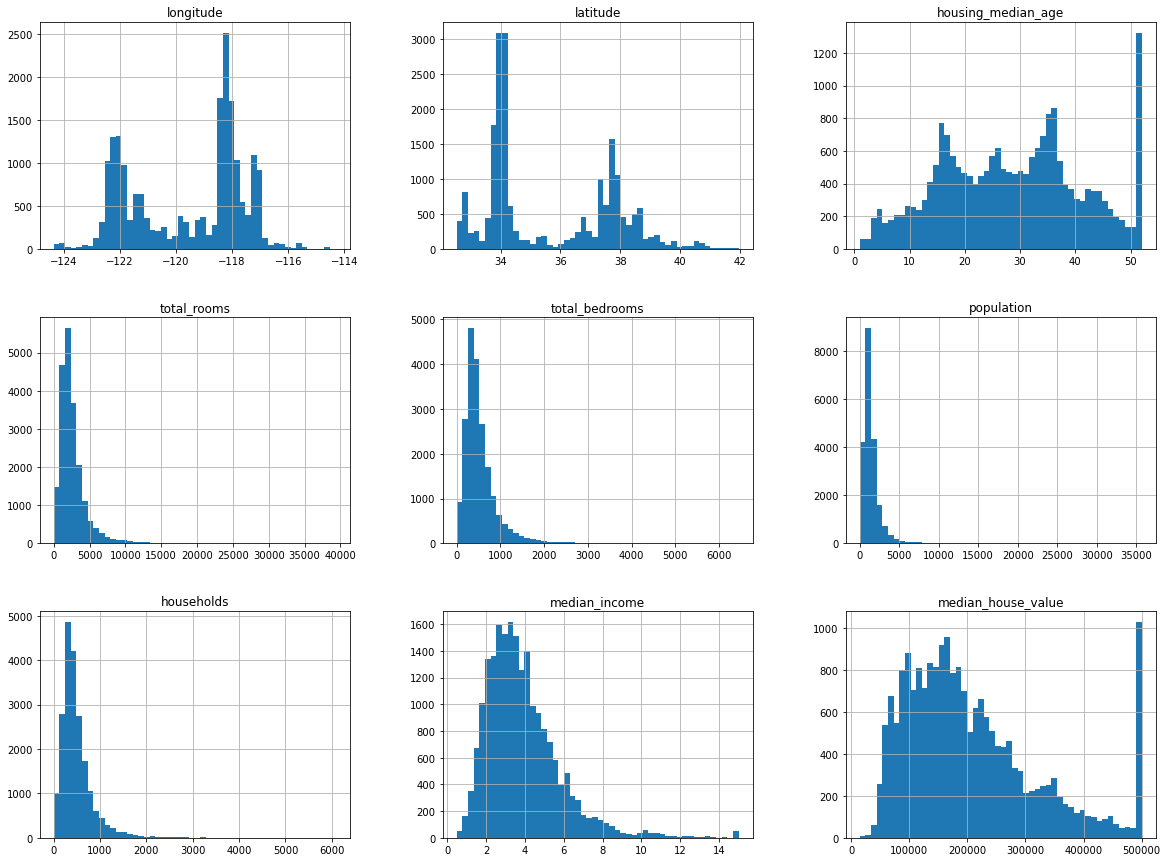

In [21]:
main_df.hist(bins=50,figsize=(20,15))

## 3.Separating The Test Set.

In [22]:
#SO EXPERT TEAMS SUGGESTED THAT INCOME VALUES ARE MUCH IMPORTANT ATTRIBUTE TO PREDICT HOUSE PRICE SO WE CAN FOCUSING OUR ATTENTION TO INCOME VALUES.

In [23]:
#MAKING NEW COLUMN NAMED INCOME CAT AND CONVERTING INCOME VALUES TO DISTINCT VALUES UING CEILING FUNCTION.

In [24]:
main_df['income_cat']=np.ceil(main_df['median_income']/1.5)

In [25]:
#CONVERTING ALL INCOME VALUES>5 INTO 5TH CATEGORY.SO WE HAVE 5 OVERALL CATEGORIES.

In [26]:
main_df['income_cat'].where(main_df['income_cat']<5,5,inplace=True)   

In [27]:
#OVERALL DISTRIBUTION BASED ON INCOME CAT

In [28]:
main_df['income_cat'].value_counts()/len(main_df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

*Stratified Sampling Technique*

In [29]:
COUNT=0

In [30]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in sss.split(main_df,main_df['income_cat']):
    train_strata_set=main_df.iloc[train_index]
    test_strata_set=main_df.iloc[test_index]
    COUNT=COUNT+1

In [64]:
COUNT

1

In [31]:
#STRATIFIED_TRAINING INCOME CAT DISTRIBUTION

In [32]:
train_strata_set['income_cat'].value_counts()/len(train_strata_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [33]:
train,test=train_test_split(main_df,test_size=0.2,random_state=42)

In [34]:
#RANDOMIZED_TRAINING SET INCOME CAT DISTRIBUTION

In [35]:
train['income_cat'].value_counts()/len(train)

3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64

In [36]:
# SEE THE DIFFERENCE! ABOVE DISTRIBUTION IS SO CLOSE TO OVERALL DISTRIBUTION. SO 
#USING STRATIFIED SAMPLING, WE ARE MAINTAINING THE SAME DISTRIBUTION IN TRAINING SET AS THAT 
#OF OVERALL SET.COOL RIGHT?

In [37]:
#lets remove that income cat as its need is over now.

In [38]:
train_strata_set=train_strata_set.drop(['income_cat'],axis=1)

In [39]:
test_strata_set=test_strata_set.drop(['income_cat'],axis=1) #Dont touch this test set until very last moment!

## 4.Exploratory Data Analysis:

In [40]:
housing=train_strata_set.copy() #for safety..

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

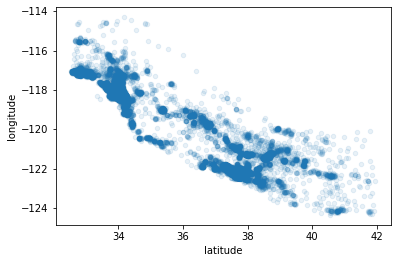

In [41]:
housing.plot(x='latitude',y='longitude',kind='scatter',alpha=0.1)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

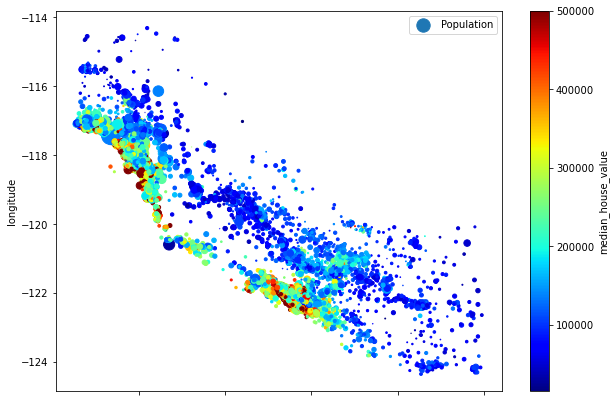

In [42]:
housing.plot(kind='scatter',x='latitude',y='longitude',s=housing['population']/100,label='Population',c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,figsize=(10,7))

*Looking For Coorelation*

In [43]:
corr=housing.corr()

In [44]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

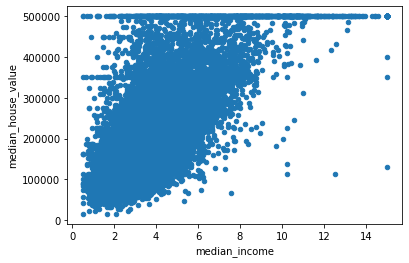

In [45]:
housing.plot(x='median_income',y='median_house_value',kind='scatter')

In [46]:
#YOU CAN SEE IN THE PLOT WHERE CAPPING OF HOUSE VALUEs IS DONE. FOR EX. AT 500k,350k etc.

#### Writing A Compact Pipeline For Various Data Transformations:

In [47]:
housing=train_strata_set.drop(['median_house_value'],axis=1)

In [48]:
housing_num=housing.drop(['ocean_proximity'],axis=1)

In [49]:
housing_cat=train_strata_set['ocean_proximity']

In [50]:
housing_labels=train_strata_set['median_house_value']

In [51]:
#Listing Out:
#A) in total rooms attribute, some values are missing. Therefore Imputer is needed.
#B) for feature scaling we need StandardScaler
#C) for combining attributes, we need custom estimator CombinedAttributesAdder.
#D) for textual attribute (ocean proximity), we need LabelBinarizer.
#E) for simplicity, we need DataFrameSelector which convert df to numpy array for sklearn convenience.

In [52]:
num_attributes=list(housing_num)

In [53]:
cat_attributes=['ocean_proximity']

In [54]:
num_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [55]:
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    num_attributes.index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

In [56]:
def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [57]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [58]:
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                      ('attritutes_adder',FunctionTransformer(add_extra_features,validate=False)),
                      ('StandardScaler',StandardScaler())
                      ])

In [59]:
full_pipeline = ColumnTransformer([('num',num_pipeline,num_attributes),('cat',OneHotEncoder(),cat_attributes)])
                                  

In [60]:
housing_prepared=full_pipeline.fit_transform(housing)

In [61]:
housing_prepared[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
        0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

## 5. Selecting And Training Model:

In [62]:
lin_reg=linear_model.LinearRegression()

In [65]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [66]:
some_data=housing.iloc[:5]
some_lables=housing_labels[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [67]:
sd_prep=full_pipeline.transform(some_data)

In [68]:
sd_prep

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [69]:
predictions=lin_reg.predict(sd_prep)
predictions

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [70]:
some_lables               #Underfitting! since linear model is simple and gen. error is huge. Cures:select powerful model,add new relevant features,remove constraints.

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [71]:
predicted=lin_reg.predict(housing_prepared)

In [72]:
print('RMSE:\t ',np.sqrt(mean_squared_error(housing_labels,predicted)))

RMSE:	  68628.19819848922


In [73]:
#Lets select powerful model :DecisionTreeRegressor  it fits multi-order relationship to data

In [74]:
dt_reg=DecisionTreeRegressor()

In [75]:
dt_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [76]:
predictedd=dt_reg.predict(housing_prepared)
print('RMSE:\t ',np.sqrt(mean_squared_error(housing_labels,predictedd)))

RMSE:	  0.0


In [77]:
#MAGIC!!! Its not! DTRegressor fits model to training data so well that rmse is 0. Model is prefectly trained on above data.
#But what about new data.This is the case of OVERFITTING. Cures:regularization,reduce noise,improve features.
#Wait dont ask for test set yet. We haven't found out best model yet.Even fine tuning is remaining.Lets work on cross validation.
#Cross-Validation allows us to estimate the skill of our model for predicting new labels.

## 5.1 GameChanger:CROSS-VALIDATION

In [78]:
scores=cross_val_score(dt_reg,housing_prepared,housing_labels,cv=10,scoring='neg_mean_squared_error')

In [79]:
tree_rmse_scores=np.sqrt(-scores)

In [80]:
print('RMSE:\t' ,tree_rmse_scores)
print('MEAN:\t',tree_rmse_scores.mean())
print('Standard Deviation:\t',tree_rmse_scores.std())

RMSE:	 [68845.03359462 65020.95516969 69915.67324824 68996.26975523
 71312.23690197 74933.0216908  69961.45209039 71584.73114381
 75464.96384455 70387.39718539]
MEAN:	 70642.17346246846
Standard Deviation:	 2856.588638496459


In [81]:
#Not so great scores right?
#cv=10 means cross_validation divides training set into 10 random complementary subsets.1 subset is spared as 
#test set and model is trained on remaining 9 subsets.finally, model is evaluated on that test set. so total 10 
#evaluation scores are obtained!

In [82]:
#Lets find how linear model scores via cross-validation

In [83]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,cv=10,scoring='neg_mean_squared_error')

In [84]:
lin_reg_rmse=np.sqrt(-lin_scores)

In [85]:
print('RMSE:\t',lin_reg_rmse)
print('MEAN:\t',lin_reg_rmse.mean())
print('standard deviation:\t',lin_reg_rmse.std())

RMSE:	 [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
MEAN:	 69052.46136345083
standard deviation:	 2731.6740017983416


In [86]:
#Even linear regression model performs better than DTR via cross validation!.

In [87]:
forest_reg=RandomForestRegressor(n_estimators=10,random_state=42)
forest_reg.fit(housing_prepared,housing_labels)
predicted_rf=forest_reg.predict(housing_prepared)
print('RMSE:\t ',np.sqrt(mean_squared_error(housing_labels,predicted_rf)))

RMSE:	  21933.31414779769


In [88]:
rf_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
rf_rmse=np.sqrt(-rf_scores)
print('RMSE:\t ',rf_rmse)

RMSE:	  [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]


In [89]:
print('MEAN:\t ',rf_rmse.mean())

MEAN:	  52583.72407377466


In [90]:
print('STANDARD DEVIATION:\t ',rf_rmse.std())

STANDARD DEVIATION:	  2298.353351147122


In [91]:
#Great we have come long way from 68k to 52k. But look randomforestregressor does perform too well on training set 
#as compared to validation set.
#its OVERFITTING THE TRAINING SET!!! cures:regularization(constraining the model),simplying model,training more data. 1st one look promising!

In [92]:
sv_reg=SVR(kernel='linear')

In [93]:
sv_reg.fit(housing_prepared,housing_labels)
predictions_sv=sv_reg.predict(housing_prepared)

In [94]:
print('RMSE:\t ',np.sqrt(mean_squared_error(housing_labels,predictions_sv)))

RMSE:	  111094.6308539982


In [95]:
scores_svr=cross_val_score(sv_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
svr_rmse=np.sqrt(-scores_svr)

In [96]:
print('RMSE:\t',svr_rmse)
print('MEAN:\t',svr_rmse.mean())
print('standard deviation:\t',svr_rmse.std())

RMSE:	 [105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
MEAN:	 111809.84009600841
standard deviation:	 2762.393664321567


## 6.FINE TUNING THE BEST MODEL:

In [97]:
#hyperparameters are indicators of the performance of the model.
#optimizing hyperparameters means optimizing the model itself!

In [98]:
param_grid=[{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]}, {'bootstrap':[False], 'n_estimators':[3,10],'max_features':[2,3,4]}]

In [99]:
forest_reg=RandomForestRegressor(random_state=42)

In [100]:
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [101]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [102]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [103]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [104]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)


63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [105]:
#SEE ABOVE GRID_SEARCH FINDS OUT MEAN_TEST_SCORES FOR EACH HYPERPARAMETER COMBINATION.(hyperparameters are given by us)
#and find best params and best estimator corresponding to optimal hyperparamter combination 
#here it is n_estimator=30,max_features=8

In [106]:
pd.DataFrame(cvres)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060213,0.006293,0.003406,0.000475,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.186998,0.008112,0.009171,0.000534,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.549681,0.004385,0.024761,0.000523,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.089762,0.001256,0.002990,0.000005,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.292351,0.003586,0.009106,0.000268,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,0.874335,0.009776,0.024537,0.000437,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.118983,0.003087,0.003268,0.000382,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.391677,0.003503,0.008712,0.000453,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.210804,0.038172,0.025233,0.000521,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.149689,0.001986,0.003119,0.000243,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


In [107]:
param_distribs={'n_estimators': randint(low=1,high=200),
                'max_features': randint(low=1,high=8)}

In [108]:
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_distribs,n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=42)
rnd_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C95318FB88>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C95318FA08>},
                   random_state=42, scoring='neg_mean_squared_error')

In [109]:
cvres=rnd_search.cv_results_
for rnd_score,param in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-rnd_score),param)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [110]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [111]:
#RandomizedSearchCV gave more fine results than GridSearchCV!!!

In [112]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [113]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

## 7.TESTING OUR FINE-TUNED BEST MODEL ON UNTOUCHED TEST SET:

In [114]:
X_test=test_strata_set.drop(['median_house_value'],axis=1)

In [115]:
Y_test=test_strata_set['median_house_value'].copy()

In [116]:
X_test_prepared=full_pipeline.transform(X_test)

In [117]:
final_model=grid_search.best_estimator_

In [118]:
final_predictions=final_model.predict(X_test_prepared)

In [119]:
print('RMSE:\t ',np.sqrt(mean_squared_error(Y_test,final_predictions)))

RMSE:	  47730.22690385927
